In [137]:
import numpy as np
import pandas as pd
from dateutil.parser import parse
import re
import matplotlib.pyplot as plt

In [69]:
x = np.arange(6,406,4)

In [70]:
x.shape

(100,)

In [71]:
a = np.array([1,2,3,np.nan,5,6,7,np.nan])

In [72]:
result = a[np.logical_not(np.isnan(a))]

In [73]:
result

array([1., 2., 3., 5., 6., 7.])

In [74]:
x= np.random.randint(100, size=(3, 5))

In [75]:
x

array([[39, 64, 58, 90, 59],
       [17,  3, 48, 44,  1],
       [20, 61, 23, 98, 68]])

In [76]:
x.max(axis = 0)

array([39, 64, 58, 98, 68])

In [77]:
series = pd.Series(np.take(list('abcdefghijklmnop'), np.random.randint(16, size=500)))


In [49]:
series

0      p
1      c
2      k
3      g
4      n
      ..
495    l
496    e
497    d
498    d
499    n
Length: 500, dtype: object

In [78]:
np.unique(series, return_counts=True)

(array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
        'n', 'o', 'p'], dtype=object),
 array([37, 39, 28, 29, 32, 38, 17, 40, 20, 31, 27, 34, 24, 39, 36, 29]))

In [79]:
date_series = pd.Series(['01 Jan 2020', '10-19-2020', '20150303', '2013/04/04', '2012-05-05', '2013-06-06T12:20'])

In [64]:
date_series = date_series.map(lambda x: parse(x))


TypeError: Parser must be a string or character stream, not Timestamp

In [62]:
date_series

0   2020-01-01 00:00:00
1   2020-10-19 00:00:00
2   2015-03-03 00:00:00
3   2013-04-04 00:00:00
4   2012-05-05 00:00:00
5   2013-06-06 12:20:00
dtype: datetime64[ns]

In [58]:
date_series.dt.day.tolist()

[1, 19, 3, 4, 5, 6]

In [59]:
date_series.dt.dayofyear.tolist()

[1, 293, 62, 94, 126, 157]

In [61]:
date_series.dt.weekday_name.tolist()

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [82]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        89 non-null     object 
 1   Model               92 non-null     object 
 2   Type                90 non-null     object 
 3   Min.Price           86 non-null     float64
 4   Price               91 non-null     float64
 5   Max.Price           88 non-null     float64
 6   MPG.city            84 non-null     float64
 7   MPG.highway         91 non-null     float64
 8   AirBags             87 non-null     object 
 9   DriveTrain          86 non-null     object 
 10  Cylinders           88 non-null     object 
 11  EngineSize          91 non-null     float64
 12  Horsepower          86 non-null     float64
 13  RPM                 90 non-null     float64
 14  Rev.per.mile        87 non-null     float64
 15  Man.trans.avail     88 non-null     object 
 16  Fuel.tank.

In [84]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


In [85]:
df.rename(columns={"Type":"TypeOfCar"})

,Manufacturer,Model,TypeOfCar,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


In [88]:
df.isnull().sum()

Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags                6
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

In [90]:
df.isnull().sum().idxmax()

'Luggage.room'

In [94]:
df.drop(['Luggage.room'], axis=1)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,13.2,5.0,177.0,102.0,68.0,37.0,26.5,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,18.0,5.0,195.0,115.0,71.0,38.0,30.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,16.9,5.0,180.0,102.0,67.0,37.0,28.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,21.1,6.0,193.0,106.0,NaN,37.0,31.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,21.1,4.0,186.0,109.0,69.0,39.0,27.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,None,Front,...,21.1,7.0,187.0,115.0,72.0,38.0,34.0,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,None,Front,...,18.5,5.0,180.0,103.0,67.0,35.0,31.5,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,None,Front,...,18.5,4.0,159.0,97.0,66.0,36.0,26.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21.0,28.0,Driver only,Rear,...,15.8,5.0,190.0,104.0,67.0,37.0,29.5,2985.0,non-USA,Volvo 240


In [95]:
df.pop('Min.Price')

0     12.9
1     29.2
2     25.9
3      NaN
4      NaN
      ... 
88    16.6
89    17.6
90    22.9
91    21.8
92    24.8
Name: Min.Price, Length: 93, dtype: float64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        89 non-null     object 
 1   Model               92 non-null     object 
 2   Type                90 non-null     object 
 3   Price               91 non-null     float64
 4   Max.Price           88 non-null     float64
 5   MPG.city            84 non-null     float64
 6   MPG.highway         91 non-null     float64
 7   AirBags             87 non-null     object 
 8   DriveTrain          86 non-null     object 
 9   Cylinders           88 non-null     object 
 10  EngineSize          91 non-null     float64
 11  Horsepower          86 non-null     float64
 12  RPM                 90 non-null     float64
 13  Rev.per.mile        87 non-null     float64
 14  Man.trans.avail     88 non-null     object 
 15  Fuel.tank.capacity  85 non-null     float64
 16  Passengers

In [99]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['high', 'medium', 'low'] * 3,
                    'price': np.random.randint(0, 15, 9)})

In [100]:
df2 = pd.DataFrame({'pazham': ['apple', 'orange', 'pine'] * 2,
                    'kilo': ['high', 'low'] * 3,
                    'price': np.random.randint(0, 15, 6)})

In [101]:
df1.head()

,fruit,weight,price
0,apple,high,3
1,banana,medium,8
2,orange,low,2
3,apple,high,3
4,banana,medium,10


In [102]:
df2.head()

,pazham,kilo,price
0,apple,high,14
1,orange,low,0
2,pine,high,14
3,apple,low,4
4,orange,high,3


In [107]:
df3 = df1.merge(df2)

In [114]:
print(df3.groupby('fruit'))

In [111]:
df3

,fruit,weight,price,pazham,kilo
0,apple,high,3,orange,high
1,apple,high,3,orange,high
2,orange,low,14,apple,high
3,orange,low,14,pine,high
4,apple,high,0,orange,low


In [115]:
city_df = pd.DataFrame(["STD,City\tState",
"33,Kolkata\tWest Bengal",
"44,Chennai\tTamil Nadu",
"40,Hyderabad\tTelengana",
"80,Bangalore\tKarnataka"], columns=['row'])


In [126]:
city_df

,row
0,"STD,City\tState"
1,"33,Kolkata\tWest Bengal"
2,"44,Chennai\tTamil Nadu"
3,"40,Hyderabad\tTelengana"
4,"80,Bangalore\tKarnataka"


In [148]:
city_table = city_df.row.str.split(r',|\t', expand=True)


In [150]:
city_table.rename(columns=city_table.iloc[0])

,STD,City,State
0,STD,City,State
1,33,Kolkata,West Bengal
2,44,Chennai,Tamil Nadu
3,40,Hyderabad,Telengana
4,80,Bangalore,Karnataka


In [187]:
names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
df_mpg = pd.read_csv("auto-mpg.data", header=None, names=names, delim_whitespace=True)


In [188]:
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [158]:
x = df_mpg['displacement']
y = df_mpg['acceleration']

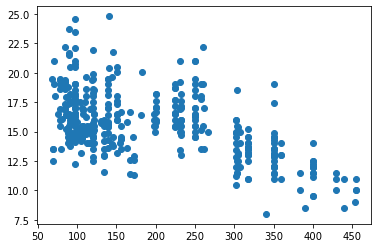

In [160]:
plt.scatter(x, y)

In [197]:
df_mpg[df_mpg.model_year==78]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
244,43.1,4,90.0,48.00,1985.0,21.5,78,2,volkswagen rabbit custom diesel
245,36.1,4,98.0,66.00,1800.0,14.4,78,1,ford fiesta
246,32.8,4,78.0,52.00,1985.0,19.4,78,3,mazda glc deluxe
247,39.4,4,85.0,70.00,2070.0,18.6,78,3,datsun b210 gx
248,36.1,4,91.0,60.00,1800.0,16.4,78,3,honda civic cvcc
249,19.9,8,260.0,110.0,3365.0,15.5,78,1,oldsmobile cutlass salon brougham
250,19.4,8,318.0,140.0,3735.0,13.2,78,1,dodge diplomat
251,20.2,8,302.0,139.0,3570.0,12.8,78,1,mercury monarch ghia
252,19.2,6,231.0,105.0,3535.0,19.2,78,1,pontiac phoenix lj
253,20.5,6,200.0,95.00,3155.0,18.2,78,1,chevrolet malibu


In [201]:
toyota_78 = df_mpg[(df_mpg.model_year==78) & (df_mpg.car_name.str.contains('toyota'))]

In [202]:
toyota_78['cylinders']

267    4
270    4
Name: cylinders, dtype: int64

<BarContainer object of 1 artists>

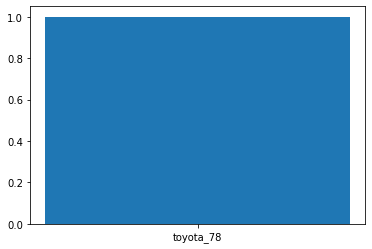

In [204]:
plt.bar('toyota_78', height =1 )

In [209]:
x=np.ones((3,3))

In [210]:
x.astype(int)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [211]:
admins = pd.DataFrame({'Name': {0: 'Megane', 1: 'Yonah', 2: 'Avner'}, 
                   'Course': {0: 'Masters', 1: 'Bachelors', 2: 'Graduate'}, 
                   'Nationality': {0: "FR", 1: "US", 2: "FR"}})

In [212]:
admins

,Name,Course,Nationality
0,Megane,Masters,FR
1,Yonah,Bachelors,US
2,Avner,Graduate,FR


In [213]:
pd.melt(admins)

,variable,value
0,Name,Megane
1,Name,Yonah
2,Name,Avner
3,Course,Masters
4,Course,Bachelors
5,Course,Graduate
6,Nationality,FR
7,Nationality,US
8,Nationality,FR


In [214]:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [215]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [222]:
tips.groupby('sex')